In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,GridSearchCV,KFold
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif, SelectKBest,RFE

# Importing The Data

In [38]:
df=pd.read_csv("/kaggle/input/housing-prices/train.csv")
df.index=df['Id']
df.drop(columns=['Id'],inplace=True)

In [39]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Know More About Data

In [40]:
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

In [41]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [42]:
df.columns[df.nunique() == 1]  #no single value

Index([], dtype='object')

In [43]:
for i in df.columns:
    print(f"{i}---->,{df[i].unique()}")

MSSubClass---->,[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning---->,['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage---->,[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea---->,[ 8450  9600 11250 ... 17217 13175  9717]
Street---->,['Pave' 'Grvl']
Alley---->,[nan 'Grvl' 'Pave']
LotShape---->,['Reg' 'IR1' 'IR2' 'IR3']
LandContour---->,['Lvl' 'Bnk' 'Low' 'HLS']
Utilities---->,['AllPub' 'NoSeWa']
LotConfig---->,['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSl

In [44]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [45]:
df['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [46]:
df['PoolQC'].isna().sum()

1453

In [47]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [48]:
df.shape

(1460, 80)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [50]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [51]:
df[df.isna().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


# Handling Null Values

In [53]:
df['PoolQC'].replace({np.nan:0},inplace=True)
df['MiscFeature'].replace({np.nan:0},inplace=True)
df['MasVnrType'].replace({np.nan:0},inplace=True)
df['LotFrontage'].replace({np.nan:df['LotFrontage'].median()},inplace=True)
df['BsmtExposure'].bfill()
df['Electrical'].bfill()

Id
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
5       SBrkr
        ...  
1456    SBrkr
1457    SBrkr
1458    SBrkr
1459    FuseA
1460    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [54]:
df.drop('Alley', axis=1,inplace=True)
df.drop('Fence', axis=1,inplace=True)
df.dropna(axis=0,subset=['GarageType'],inplace=True)

In [55]:
df = df[df['TotalBsmtSF'] != 0]

In [56]:
mode_value = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(mode_value, inplace=True)

In [57]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

In [58]:
df[df.isna().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
235,60,RL,69.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,216500
333,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,284000
530,20,RL,69.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,WD,Normal,184900
949,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2006,WD,Normal,192500
974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,New,Partial,465000


In [59]:
df.fillna(method='bfill',inplace=True)

In [60]:
df.duplicated().sum()

0

In [61]:
df.shape

(1349, 78)

In [62]:
# I could use simple-impute or knn-impute but i forgot to use it and remembered after i have done that

# Handling Outliers

In [63]:
num=df.select_dtypes(include=['int64','float64'])
num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


# Before Removing Outliers

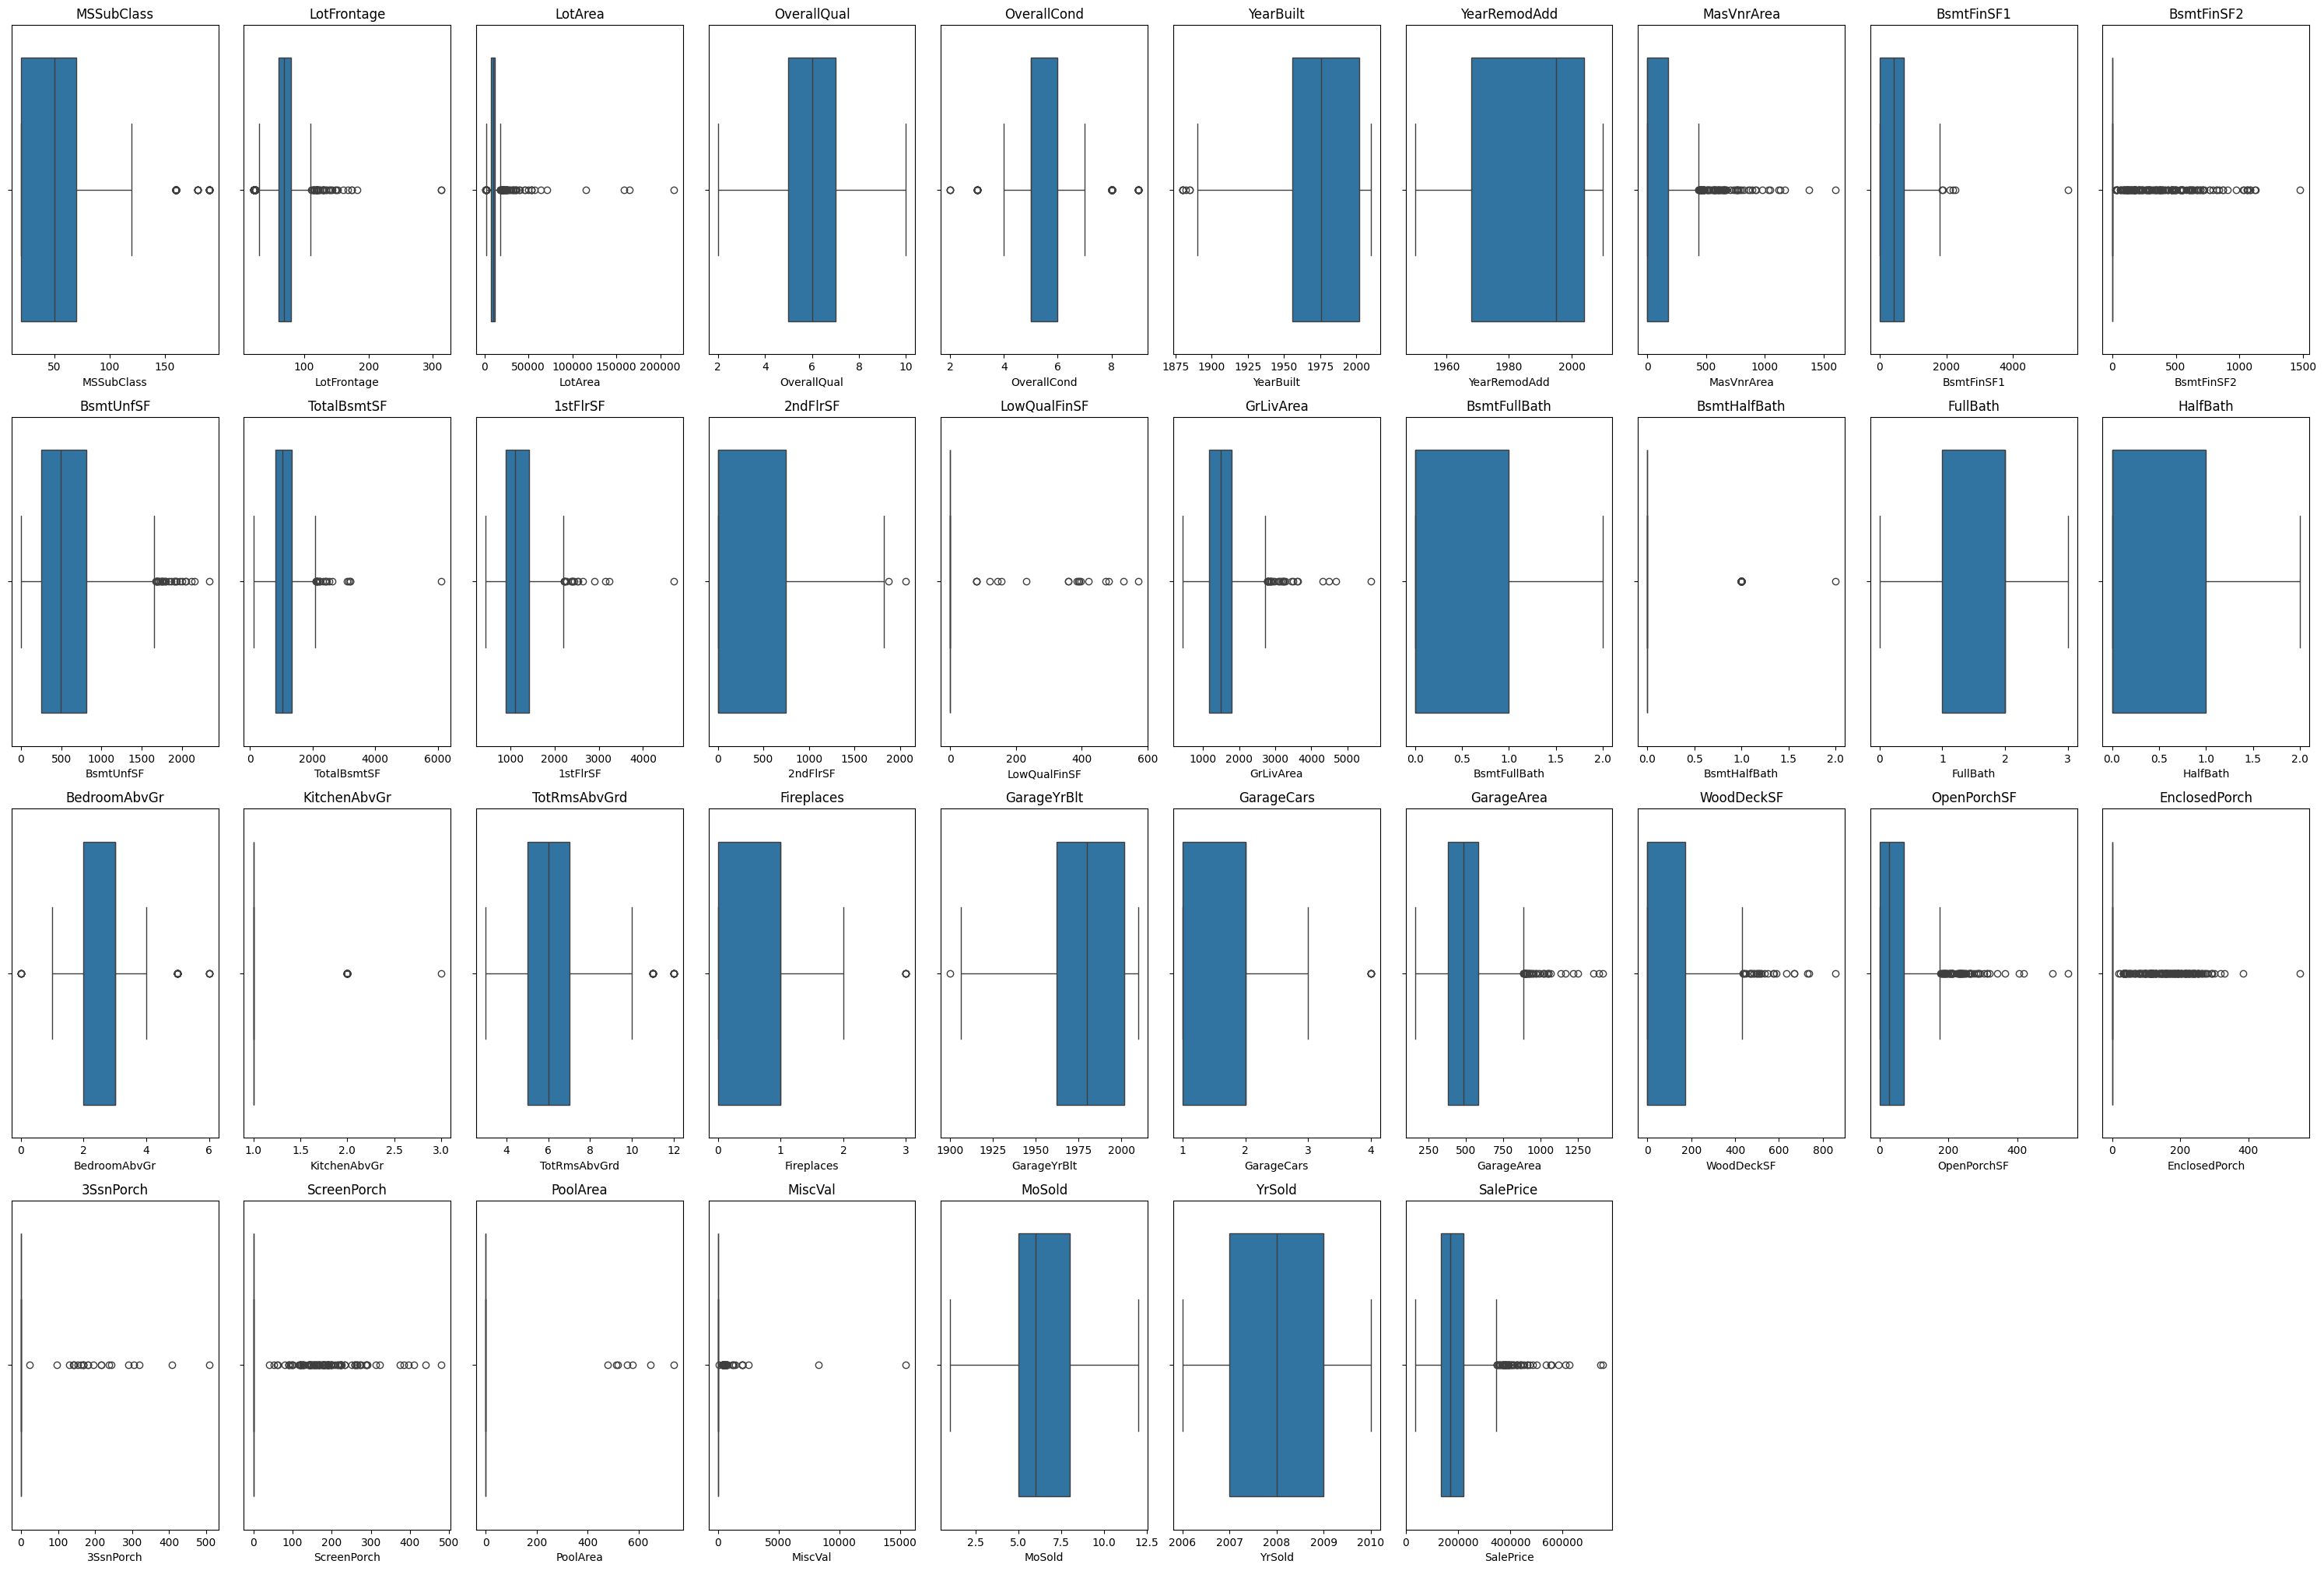

In [64]:
fig, axes = plt.subplots(nrows=8, ncols=10, figsize=(30,40))
axes = axes.flatten()
for i, col_name in enumerate(num.columns):
    sns.boxplot(x=num[col_name], ax=axes[i])
    axes[i].set_title(col_name)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.tight_layout()
plt.show()

In [65]:
def remove_outliers(df):
    ipt = df.select_dtypes(include=['int64', 'float64']).drop('SalePrice', axis=1)
    for i in ipt.columns:
        q1 = ipt[i].quantile(0.25)
        q3 = ipt[i].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df = df[(df[i] >= lower) & (df[i] <= upper)]
    return df
df=remove_outliers(df)

In [66]:
ipt=df.select_dtypes(include=['int64','float64']).drop('SalePrice',axis=1)

# After Removing Outliers

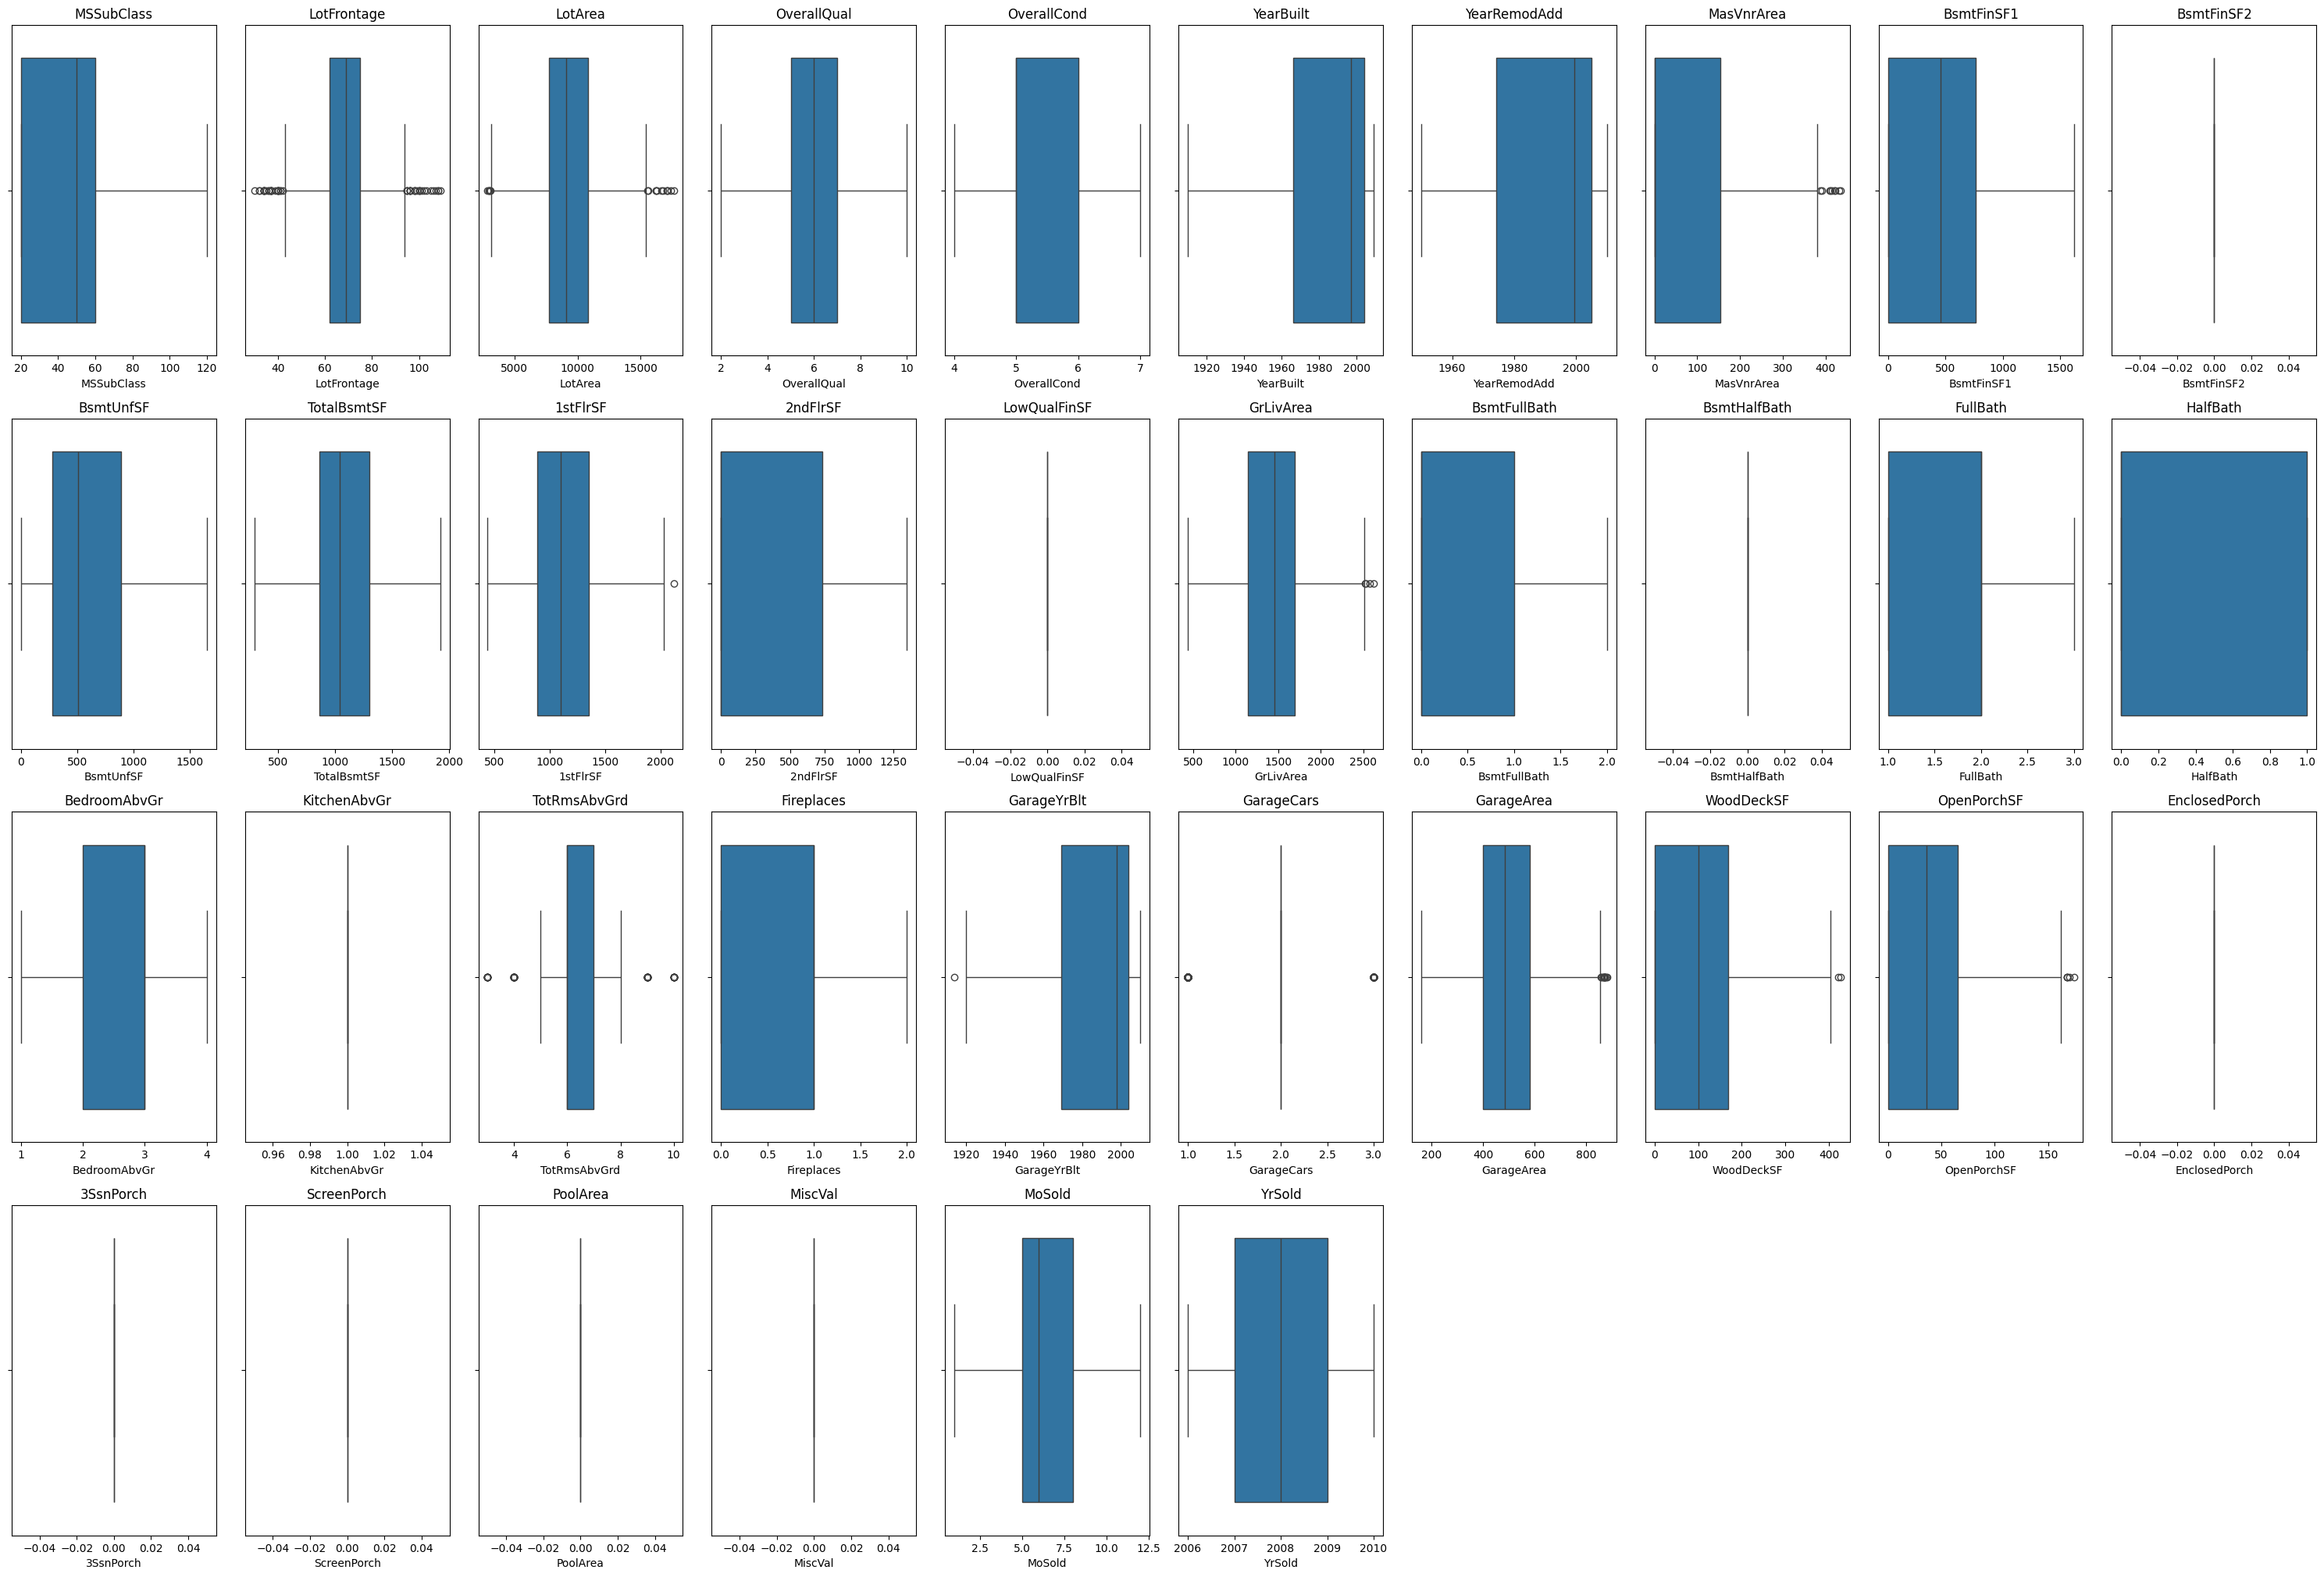

In [67]:
fig, axes = plt.subplots(nrows=8, ncols=10, figsize=(30,40))
axes = axes.flatten()
for i, col_name in enumerate(ipt.columns):
    sns.boxplot(x=ipt[col_name], ax=axes[i])
    axes[i].set_title(col_name)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.tight_layout()
plt.show()

In [87]:
for i in df.select_dtypes(include=[np.number]).columns:
    if df[i].min() == 0 and df[i].max() == 0:
        df = df.drop(i, axis=1)
    elif df[i].min()==df[i].max():
        df = df.drop(i, axis=1)

In [97]:
df.shape

(546, 69)

# Analysis

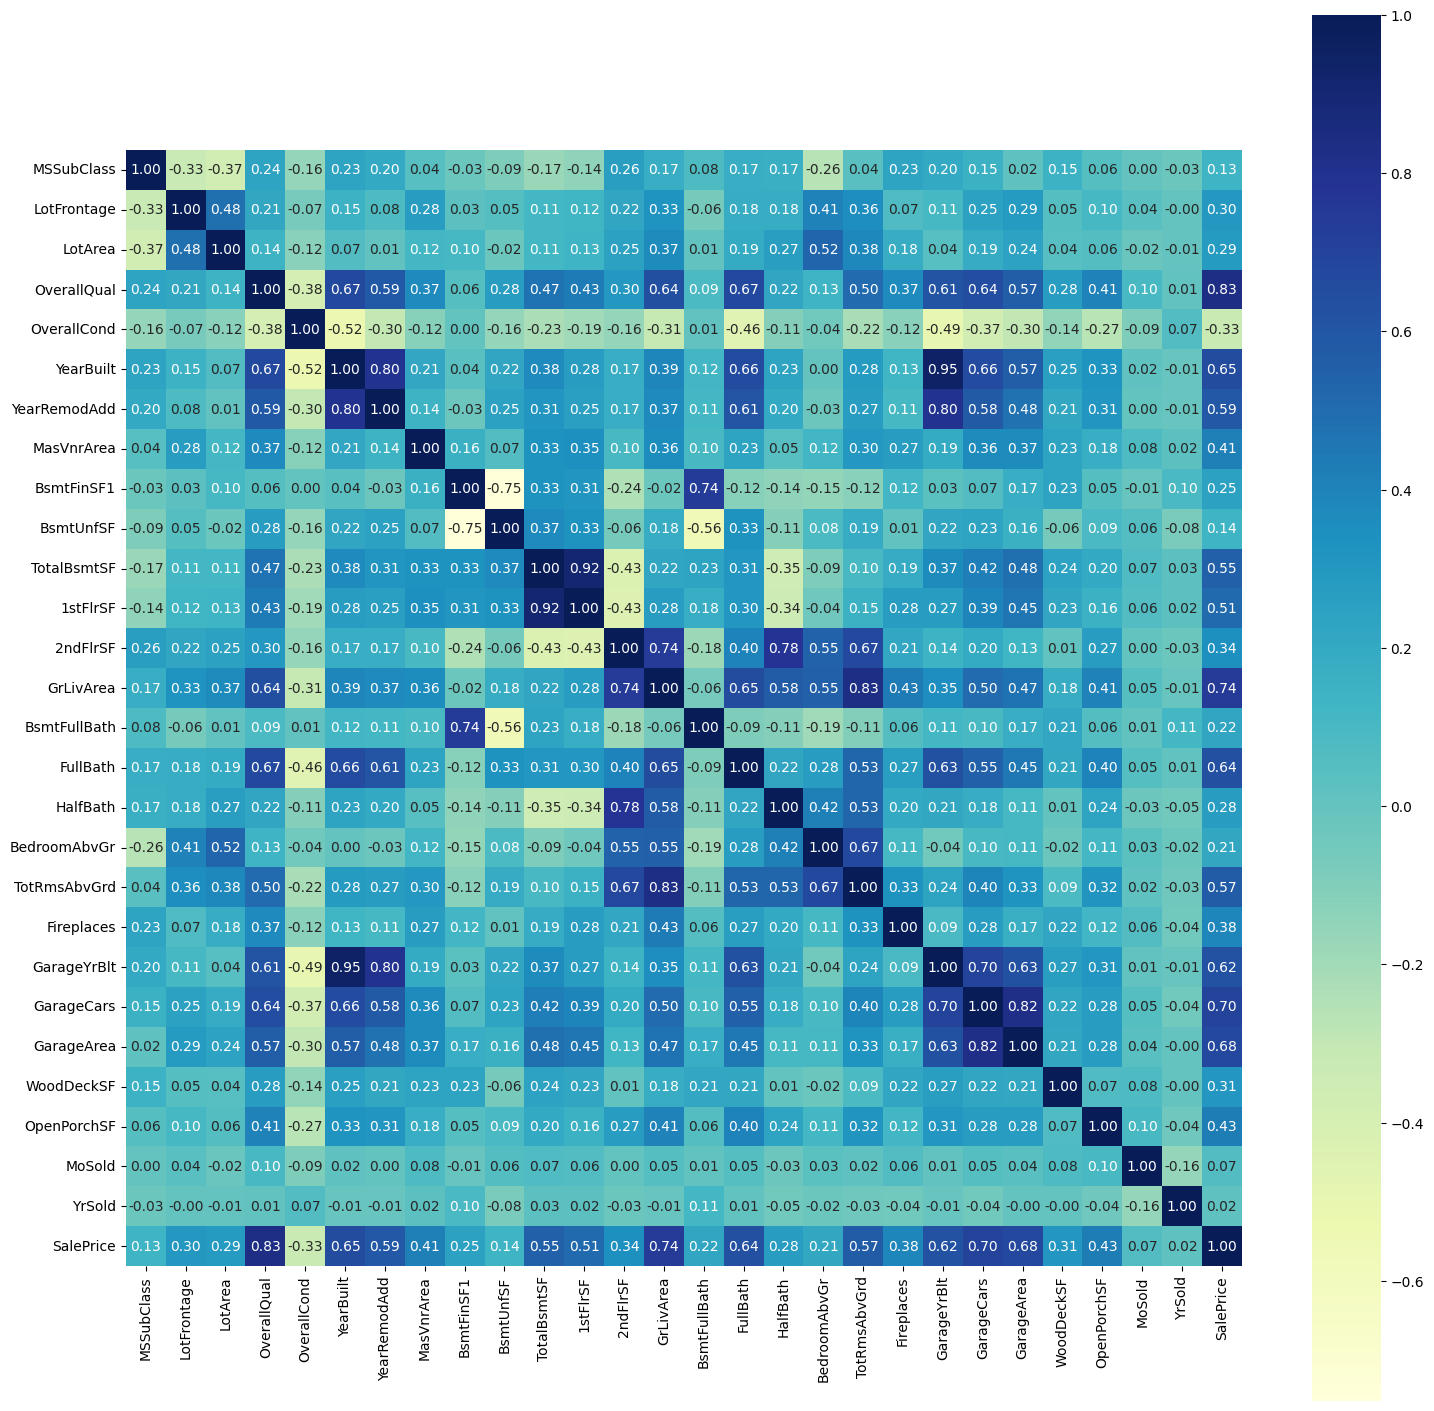

In [99]:
plt.figure(figsize=(18,18))
cor=df.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap='YlGnBu',square=True, fmt='.2f')
plt.show()

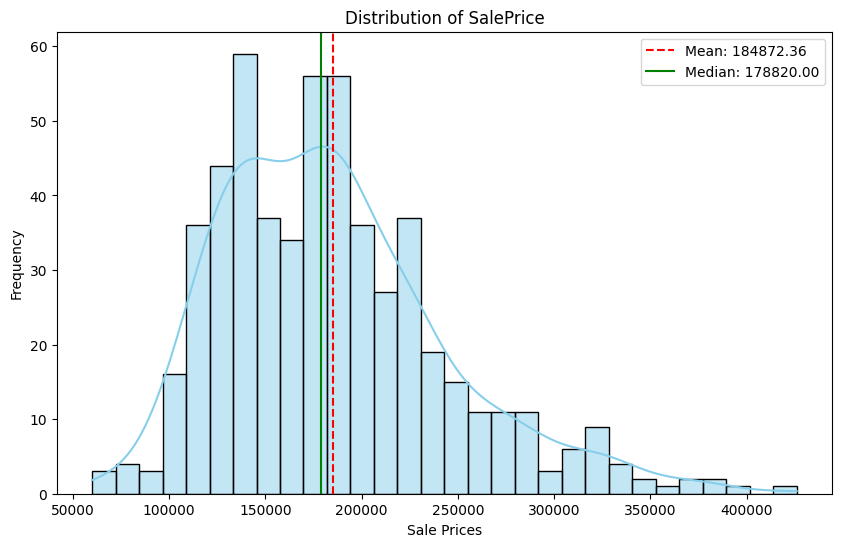

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, color='skyblue',bins=30)

plt.title('Distribution of SalePrice')
plt.xlabel('Sale Prices')
plt.ylabel('Frequency')

mean= df.SalePrice.mean()
median = df.SalePrice.median()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', label=f'Median: {median:.2f}')

plt.legend()

plt.show()

# Splitting Data

In [90]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']
for i in x.select_dtypes(include=['object', 'category']).columns:
    x[i]=x[i].astype(str)

# Grid search With CV

In [91]:
# Split Data Types
categorical_cols = x.select_dtypes(include=['object', 'category']).columns
numerical_cols = x.select_dtypes(include=[np.number]).columns

# Encoding
categorical_preprocessor = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('feature_selection', SelectKBest(score_func=chi2, k='all'))
])

# Numerical Preprocessing and Feature Selection
numerical_preprocessor = Pipeline(steps=[
    ('variance_threshold', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all'))
])

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_preprocessor, categorical_cols),
        ('num', numerical_preprocessor, numerical_cols)
    ])

# Define the main pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define the parameter grid for Grid Search
param_grid = {
    'preprocessor__num__variance_threshold__threshold': [0.1, 0.01, 0.05, 0.5, 0.3, 0.7],
    'preprocessor__num__feature_selection__k': [2, 3, 'all',5],
    'preprocessor__cat__feature_selection__k': [1, 2, 'all',5],
    'regressor__fit_intercept': [True, False]
}

# Cross-Validation Using K-Fold
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Grid-Search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='r2', error_score='raise')

try:
    grid_search.fit(x, y)
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    print(f"Best R^2 Score: {best_score}")
    print(f"Best Parameters: {best_params}")
except Exception as e:
    print(f"An error occurred: {e}")

Best R^2 Score: 0.8757863261956012
Best Parameters: {'preprocessor__cat__feature_selection__k': 5, 'preprocessor__num__feature_selection__k': 'all', 'preprocessor__num__variance_threshold__threshold': 0.3, 'regressor__fit_intercept': True}


# Train-Test-Split Method

In [92]:
# Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

# Split Data Types
cat_train=x_train.select_dtypes(include=['object', 'category']).columns
num_train = x_train.select_dtypes(include=[np.number]).columns
cat_test=x_test.select_dtypes(include=['object', 'category']).columns
num_test = x_test.select_dtypes(include=[np.number]).columns

# Encoding
ore= OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit-Transform
x_train[cat_train]=ore.fit_transform(x_train[cat_train])
x_test[cat_test]=ore.transform(x_test[cat_test])

# Scaling Numerical Columns

In [93]:
sc=StandardScaler()
x_train[num_train]=sc.fit_transform(x_train[num_train])
x_test[num_test]=sc.transform(x_test[num_test])

# Handle Low Variance Features

In [94]:
selector = VarianceThreshold(threshold=0.3)
x_train = selector.fit_transform(x_train)
x_test = selector.transform(x_test)

# Prediction

In [95]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
train_score=model.score(x_train,y_train)
print(f"The Train is: {train_score}")
print(f"Prediction Score is: {r2score}")
print(f"MSE Score is: {mse}")

The Train is: 0.9089507725461389
Prediction Score is: 0.9075832421426309
MSE Score is: 272059880.9541598


# Prediction Plot

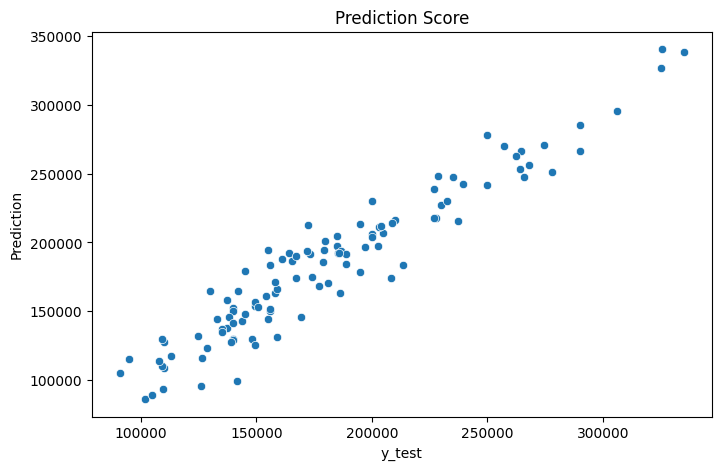

In [96]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test,y=y_pred)
plt.title("Prediction Score")
plt.xlabel("y_test")
plt.ylabel("Prediction")
plt.show()